In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import tqdm

In [44]:
num_pretrain_entities = np.load("num_pretrain_entities/triviaqa_validation.npy", )
# num_pretrain_entities_bins = np.array([np.inf, 1e7, 1e5, 1e3, 1e1, 0])
num_pretrain_entities_bins = np.array([np.inf, 1e3, 1e2, 16, 2, 0])

In [45]:
false_facts_full = np.load("ckpts/sft_triviaqa_GPT2/checkpoint_05000/hf_model/eval_unfiltered_output_strings.npy")
false_facts = []
good_false_facts_idxs = []
for i, fact in enumerate(false_facts_full):
    if "answer is" in fact and fact[-1] == ".":
        filtered_fact = fact.split("answer is")[1]
        if len(filtered_fact)>0 and filtered_fact[-1] == ".":
            filtered_fact = filtered_fact[:-1]
        filtered_fact = filtered_fact[1:]
        good_false_facts_idxs.append(i)
    else:
        filtered_fact = fact
        # print(filtered_fact)
    false_facts.append(filtered_fact)


false_facts = np.array(false_facts)
idxs  = np.where(np.load("ckpts/sft_triviaqa_GPT2/checkpoint_05000/hf_model/eval_unfiltered_answers_correct.npy")==0)[0]
idxs = np.intersect1d(idxs, good_false_facts_idxs)
num_pretrain_entities= num_pretrain_entities[idxs]

In [46]:
model_path = "ckpts/rm_tiviaqa_llama7B_50_50/checkpoint_05000/hf_model/"

eval_False_log_prob_generation =  np.load(os.path.join(model_path, "eval_False_log_prob_generation.npy"))
eval_True_log_prob_generation =  np.load(os.path.join(model_path, "eval_True_log_prob_generation.npy"))

In [47]:
True_prob_generation_means = []
False_prob_generation_means = []

for i in range(len(num_pretrain_entities_bins) - 1):
    bin_upper = num_pretrain_entities_bins[i]
    bin_lower = num_pretrain_entities_bins[i + 1]

    indices = np.where((num_pretrain_entities >= bin_lower) & (num_pretrain_entities < bin_upper))[0]
    print(len(indices))

    True_prob_generation_means.append(np.mean(np.e**eval_True_log_prob_generation[indices]))
    False_prob_generation_means.append(np.mean(np.e**eval_False_log_prob_generation[indices]))

7387
1108
234
42
2008


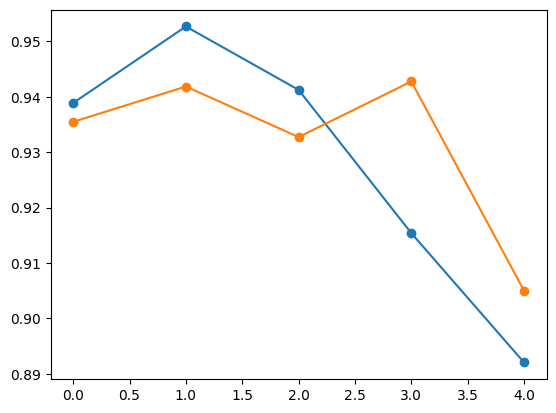

In [48]:
plt.plot([0, 1, 2, 3, 4], True_prob_generation_means, "o-", label="True")
plt.plot([0, 1, 2, 3, 4], False_prob_generation_means, "o-",label="False")